            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


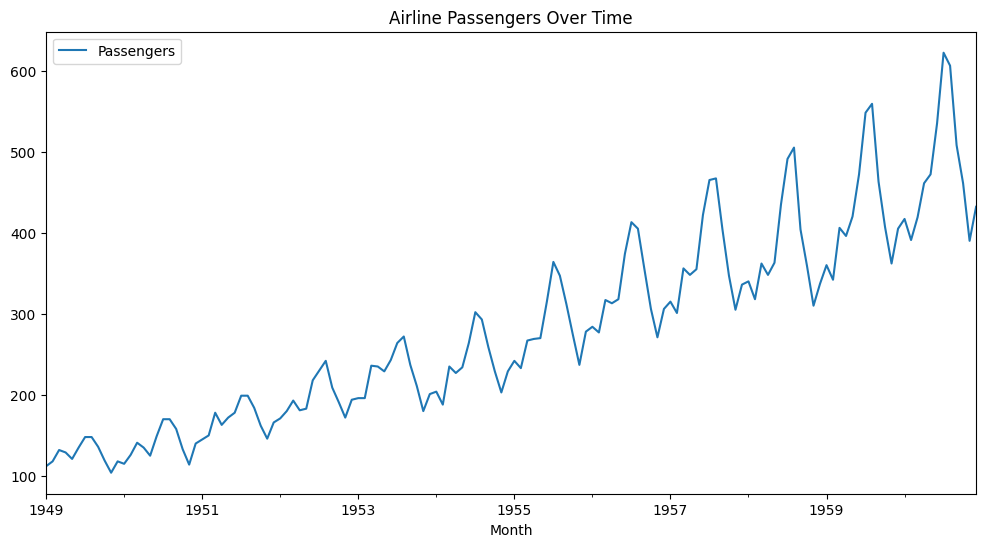

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
ADF Statistic (Differenced): -2.8292668241700047
p-value (Differenced): 0.05421329028382478


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -523.758
Date:                Tue, 23 Sep 2025   AIC                           1057.516
Time:                        10:17:53   BIC                           1071.197
Sample:                    01-01-1949   HQIC                          1063.069
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3280      0.145      2.268      0.023       0.045       0.611
ar.L2          0.2521      0.165      1.528      0.126      -0.071       0.575
ma.L1         -0.0125      0.109     -0.114      0.9

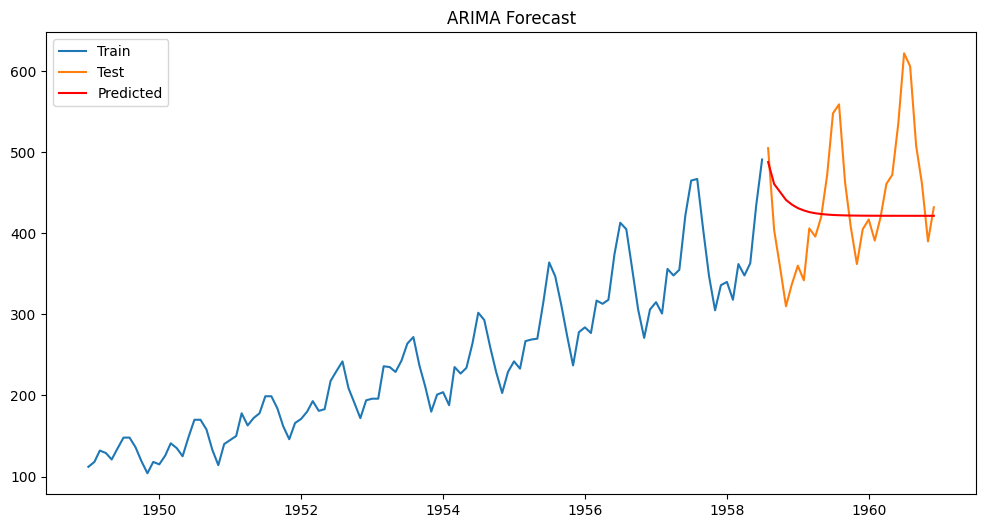

In [1]:
import pandas as pd
df = pd.read_csv('/content/airline-passengers.csv', parse_dates=['Month'], index_col='Month')
df.index

print(df.head())
print(df.info())
print(df.describe())

import matplotlib.pyplot as plt
df.plot(figsize=(12,6), title="Airline Passengers Over Time")
plt.show()

from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Passengers'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

df_diff = df.diff().dropna()

result_diff = adfuller(df_diff['Passengers'])
print("ADF Statistic (Differenced):", result_diff[0])
print("p-value (Differenced):", result_diff[1])

df_diff2 = df_diff.diff().dropna()
result_diff2 = adfuller(df_diff2['Passengers'])

train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]


from statsmodels.tsa.arima.model import ARIMA
p = 2  #ar order
d = 1  # Diff order
q = 2  # MA order

model = ARIMA(train, order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Predicted', color='red')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()
